In [14]:
import pandas as pd
import numpy as np

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This line allows for inline plotting in Jupyter Notebooks, displaying plots directly below the code cells.
%matplotlib inline

In [16]:
import seaborn as sns

In [17]:
%run ../config/seaborn_config.ipynb

##### Stacked Barplot - weak/strong correlation

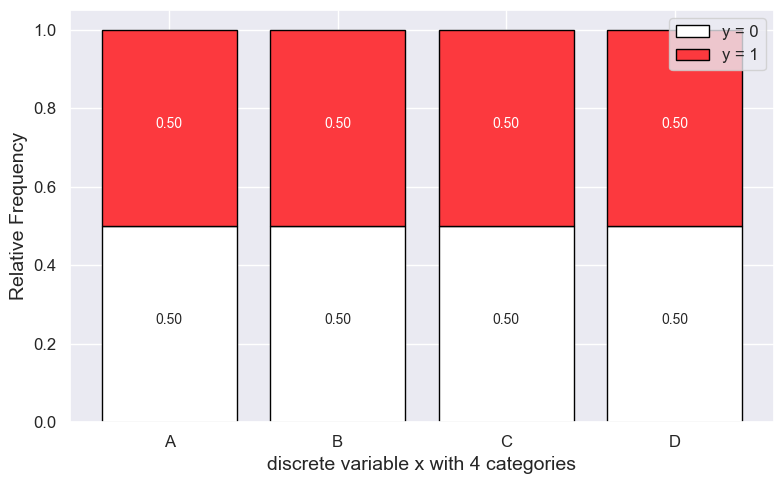

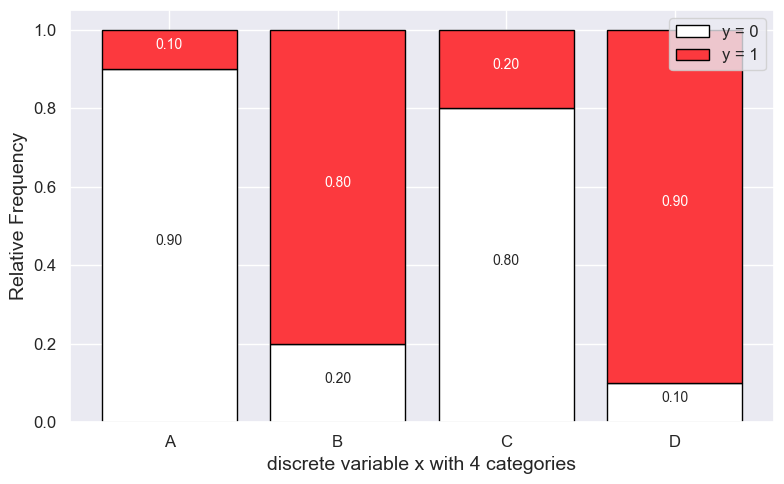

In [18]:
# Create DataFrames for weak and strong correlation manually

# Weak correlation: Equal proportion of 0 and 1 in all x categories
data_weak = {
    'x': ['A', 'B', 'C', 'D'],
    'y_0': [25, 25, 25, 25],  # Proportion of y = 0
    'y_1': [25, 25, 25, 25]   # Proportion of y = 1
}

# Strong correlation: y is mostly 0 for 'A' and 'C', mostly 1 for 'B' and 'D'
data_strong = {
    'x': ['A', 'B', 'C', 'D'],
    'y_0': [45, 10, 40, 5],    # Proportion of y = 0
    'y_1': [5, 40, 10, 45]     # Proportion of y = 1
}

# Convert to DataFrames
df_weak = pd.DataFrame(data_weak)
df_strong = pd.DataFrame(data_strong)

# Function to plot stacked bar charts with relative frequency and labels
def plot_stacked_bar(df):
    # Calculate relative frequencies (probability)
    df['total'] = df['y_0'] + df['y_1']
    df['y_0_prob'] = df['y_0'] / df['total']
    df['y_1_prob'] = df['y_1'] / df['total']

    # Plot the stacked bar chart
    fig, ax = plt.subplots()
    bars_y0 = ax.bar(df['x'], df['y_0_prob'], label='y = 0', color='white', edgecolor='black')
    bars_y1 = ax.bar(df['x'], df['y_1_prob'], bottom=df['y_0_prob'], label='y = 1', color='#FC393E', edgecolor='black')

    # Add value labels on top of the bars
    for bar in bars_y0:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='center', fontsize=10)

    for bar in bars_y1:
        height = bar.get_height() + bar.get_y()
        ax.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, height - bar.get_height() / 2),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='center', fontsize=10, color='white')

    # Customize plot
    plt.xlabel('discrete variable x with 4 categories')
    plt.ylabel('Relative Frequency')
    plt.legend(loc='upper right')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot the weak correlation example
plot_stacked_bar(df_weak)

# Plot the strong correlation example
plot_stacked_bar(df_strong)


In [19]:
from scipy.stats import chi2_contingency

# Create DataFrames for weak and strong correlation manually

# Weak correlation: Equal proportion of 0 and 1 in all x categories
data_weak = {
    'x': ['A', 'B', 'C', 'D'],
    'y_0': [25, 25, 25, 25],  # Proportion of y = 0
    'y_1': [25, 25, 25, 25]   # Proportion of y = 1
}

# Strong correlation: y is mostly 0 for 'A' and 'C', mostly 1 for 'B' and 'D'
data_strong = {
    'x': ['A', 'B', 'C', 'D'],
    'y_0': [45, 10, 40, 5],    # Proportion of y = 0
    'y_1': [5, 40, 10, 45]     # Proportion of y = 1
}

# Convert to DataFrames
df_weak = pd.DataFrame(data_weak)
df_strong = pd.DataFrame(data_strong)

# Function to calculate Cramér's V
def cramers_v(df):
    # Create contingency table
    contingency_table = df[['y_0', 'y_1']].values
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum()  # Total number of observations
    num_rows, num_cols = contingency_table.shape  # Number of rows (categories of x) and columns (categories of y)
    v = np.sqrt(chi2 / (n * min(num_rows - 1, num_cols - 1)))
    
    return v

# Calculate Cramér's V for weak and strong correlation
v_weak = cramers_v(df_weak)
v_strong = cramers_v(df_strong)

print(f"Cramér's V (Weak Correlation): {v_weak:.4f}")
print(f"Cramér's V (Strong Correlation): {v_strong:.4f}")


Cramér's V (Weak Correlation): 0.0000
Cramér's V (Strong Correlation): 0.7071
